In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
DATADIR = "/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset"


In [10]:
Normal_Path = os.path.join(DATADIR, 'healthyEyshor')
trachoma_Path = os.path.join(DATADIR,'trachomaDatasettfti')

In [11]:
#Number in Normal
Normal_names = os.listdir(Normal_Path)
print(len(Normal_names))
print(Normal_names[:10])

789
['image336.jpg', 'image493.jpg', 'image487.jpg', 'image1030.jpg', 'image108.jpg', 'image134.jpg', 'image120.jpg', 'image1597.jpg', 'image1568.jpg', 'image1540.jpg']


In [12]:
#Number in Diabetic Retinopathy
T_names = os.listdir(trachoma_Path)
print(len(T_names)) #More class weights here
print(T_names[:10])

638
['trachomaDatasettftiimage704.jpg', 'trachomaDatasettftiimage1253.jpg', 'trachomaDatasettftiimage923.jpg', 'trachomaDatasettftiimage260.jpg', 'trachomaDatasettftiimage512.jpg', 'trachomaDatasettftiimage248.jpg', 'trachomaDatasettftiimage314.jpg', 'trachomaDatasettftiimage1119.jpg', 'trachomaDatasettftiimage1131.jpg', 'trachomaDatasettftiimage116.jpg']


In [15]:
img = trachoma_Path+"/trachomaDatasettftiimage481.jpg"
img

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/trachomaDatasettfti/trachomaDatasettftiimage481.jpg'

In [16]:
img_array = cv2.imread(img ,cv2.IMREAD_UNCHANGED) 
#print(type(img_array))
# Specifying color for Leukoscognosis iterating
new_array = cv2.resize(img_array, (150, 150)) 

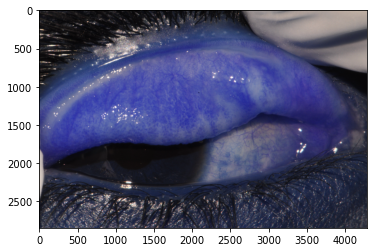

In [17]:
CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]

for category in CATEGORIES:  # creating for loop to iterate over categories
    path = os.path.join(DATADIR,category)  # create acessble path to dataset
    for img in os.listdir(path):  # For loop inside a for loop to iterate and specify conditions for specifc images
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)  # convert to array
        plt.imshow(img_array)  # graph it using matplotlive
        plt.show()  # display

        break  #Ending for loop
    break

In [18]:
print(img_array.shape)

(2848, 4288, 3)


In [19]:
IMG_SIZE = 150
CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        Normal_Path = os.path.join(DATADIR, 'healthyEyshor')
        trachoma_Path = os.path.join(DATADIR,'trachomaDatasettfti')

        for img in os.listdir(path):  # iterate over each of the classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED)  # Specifying color for Leukoscognosis iterating
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                pass
    return training_data

In [20]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    print(path)
    print(os.listdir(path))

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/healthyEyshor
['image336.jpg', 'image493.jpg', 'image487.jpg', 'image1030.jpg', 'image108.jpg', 'image134.jpg', 'image120.jpg', 'image1597.jpg', 'image1568.jpg', 'image1540.jpg', 'image1232.jpg', 'image1554.jpg', 'image1391.jpg', 'image1385.jpg', 'image1408.jpg', 'image1352.jpg', 'image1420.jpg', 'image63.jpg', 'image1193.jpg', 'image242.jpg', 'image524.jpg', 'image1187.jpg', 'image1178.jpg', 'image281.jpg', 'image1150.jpg', 'image1636.jpg', 'image88.jpg', 'image295.jpg', 'image1623.jpg', 'image89.jpg', 'image280.jpg', 'image1637.jpg', 'image1179.jpg', 'image257.jpg', 'image525.jpg', 'image76.jpg', 'image62.jpg', 'image1347.jpg', 'image1353.jpg', 'image1384.jpg', 'image1233.jpg', 'image1555.jpg', 'image1541.jpg', 'image1582.jpg', 'image135.jpg', 'image109.jpg', 'image486.jpg', 'image1031.jpg', 'image445.jpg', 'image337.jpg', 'image309.jpg', 'image321.jpg', 'imag

In [21]:
training_data = create_training_data()  

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [23]:
len(training_data)

1426

In [26]:
import random

random.shuffle(training_data)
#Shuffling the data in order to ensure that the machine does not learn just Leukemia or White BLood cells. Allows for a variety in data.
#Shuffles the new training data created, is a mutable list, meaning it can be changed
for sample in training_data[:10]: #Printed out 10 samples
    print(sample[1])

0
0
0
0
1
0
0
0
1
0


In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)   
y = np.array(y) 
X.shape, y.shape
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X.shape, y.shape

((1426, 150, 150, 3), (1426,))

In [28]:
y.sum()

637

In [29]:
X.shape[1:]

(150, 150, 3)

In [30]:
y.shape

(1426,)

In [39]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.96):
            print("\nReached 96% accuracy so cancelling training!")
            self.model.stop_training = True


In [40]:
from tensorflow.keras.optimizers import Adam

In [41]:
#Runing this one
callbacks = myCallback()

tf.compat.v1.random.set_random_seed(1234)
model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolutio
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:]), #input_shape=X.shape[1:]
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001,amsgrad=True),
              metrics=[tf.keras.metrics.AUC(),'accuracy'])

In [42]:
class_weight = {0: 1.,
                1: 10.}

In [43]:
X = X.astype('float32') 
print(X.dtype)

float32


In [44]:
history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.15, class_weight=class_weight, callbacks= [callbacks])

Epoch 1/100
38/38 [==============================] - 19s 483ms/step - loss: 2.9189 - auc_1: 0.4680 - accuracy: 0.4458 - val_loss: 1.8305 - val_auc_1: 0.4532 - val_accuracy: 0.4953
Epoch 2/100
38/38 [==============================] - 18s 478ms/step - loss: 1.7975 - auc_1: 0.4866 - accuracy: 0.4463 - val_loss: 1.7743 - val_auc_1: 0.5460 - val_accuracy: 0.4953
Epoch 3/100
38/38 [==============================] - 18s 478ms/step - loss: 1.7516 - auc_1: 0.5556 - accuracy: 0.4363 - val_loss: 1.1553 - val_auc_1: 0.6885 - val_accuracy: 0.4953
Epoch 4/100
38/38 [==============================] - 18s 483ms/step - loss: 1.6539 - auc_1: 0.6871 - accuracy: 0.4380 - val_loss: 0.9424 - val_auc_1: 0.7693 - val_accuracy: 0.4953
Epoch 5/100
38/38 [==============================] - 18s 483ms/step - loss: 1.5471 - auc_1: 0.7475 - accuracy: 0.4501 - val_loss: 1.0550 - val_auc_1: 0.8042 - val_accuracy: 0.4953
Epoch 6/100
38/38 [==============================] - 19s 489ms/step - loss: 1.4842 - auc_1: 0.7786 -

In [45]:
model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)       

In [46]:
model.save('normalvtrach')

INFO:tensorflow:Assets written to: normalvtrach/assets


In [47]:
from tensorflow.keras.models import load_model
# load model4545
model = load_model('normalvtrach')

<function matplotlib.pyplot.show(close=None, block=None)>

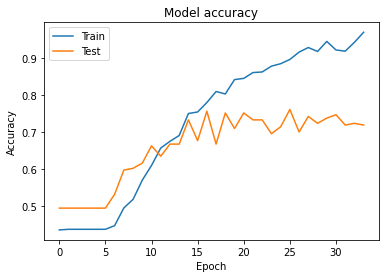

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tqdm as tqdm
#Utlizing matplotlib to graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

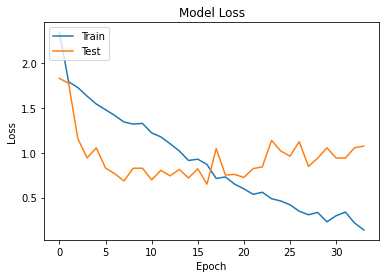

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

In [50]:
#Test
TEST = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset'
normal_test="/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/healthTesracht"
# dr_test = os.path.join(TEST, 'diabetesTest')
# normal_test = os.path.join(TEST, 'normalTest')
normal_test

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/healthTesracht'

In [51]:
t_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/trachTest'
t_test


'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/trachTest'

In [54]:
print(len(os.listdir(normal_test)))
print(len(os.listdir(t_test))) # dr test

39
10


In [55]:
IMG_SIZE = 150
CATEGORIES = ["healthTesracht","trachTest"]
def create_test_data():
    test_data = []
    for category in CATEGORIES:  
        path = os.path.join(TEST,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        t_test = os.path.join(TEST, 'trachTest')
        normal_test = os.path.join(TEST, 'healthTesracht')
        
#         for item in os.listdir(path):
#             if item.startswith('.') and not os.path.isfile(os.path.join(path, item)):
#                 path.remove(item)
                
        for img in os.listdir(path):  # iterate over each of the classes
            try:
                #print(os.path.join(path,img))
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                print(os.path.join(path,img))
                pass
    return test_data

In [56]:
test_data = create_test_data()

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/healthTesracht/.DS_Store
OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/trachTest/.DS_Store


In [57]:
Z = [] #testing data
t = [] #lables

for features,label in test_data:
    Z.append(features)
    t.append(label)
Z = np.array(Z)   
t = np.array(t) 
Z.shape, t.shape
#X.shape, y.shape 

((47, 150, 150, 3), (47,))

In [58]:
model.evaluate(Z,t)

2/2 [==============================] - 0s 50ms/step - loss: 0.8811 - auc_1: 0.9006 - accuracy: 0.7872


[0.8811324238777161, 0.9005846977233887, 0.7872340679168701]

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 128)
(1, 9, 9, 128)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


(1, 9, 9, 128)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


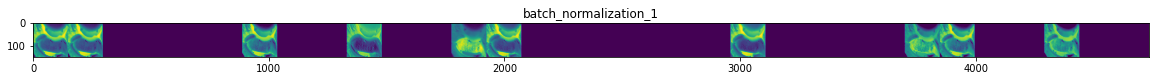

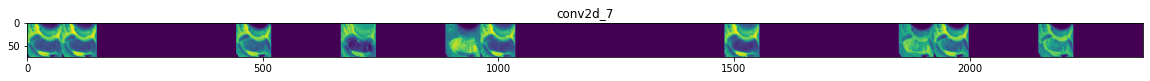

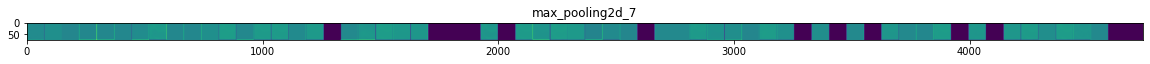

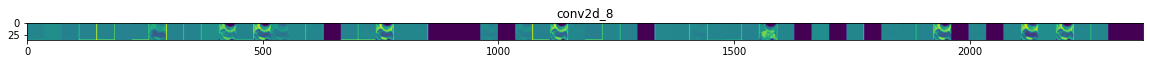

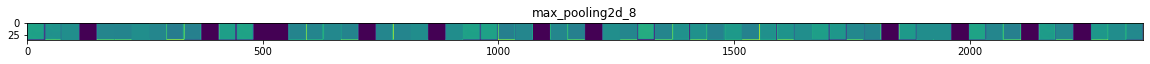

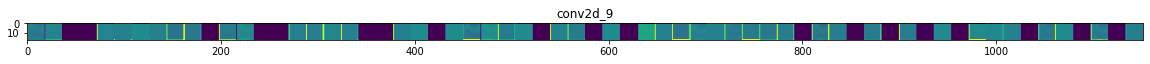

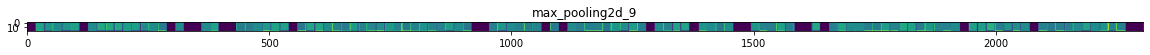

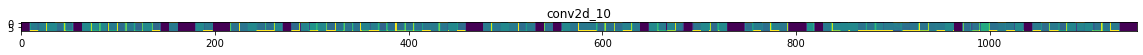

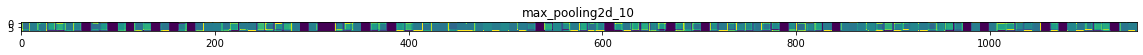

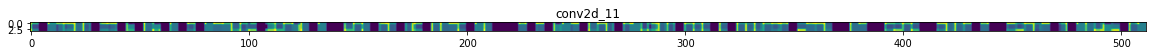

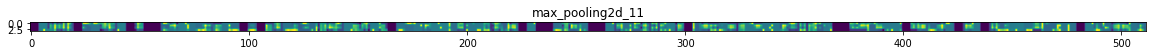

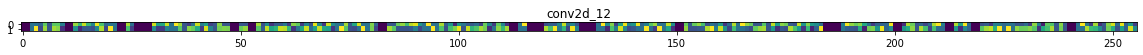

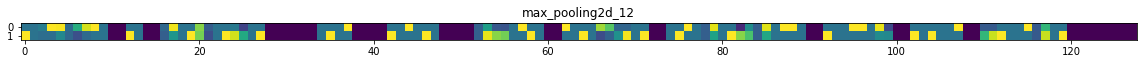

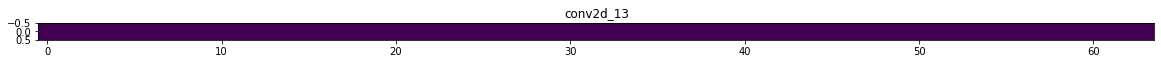

In [64]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
normal_file = [os.path.join(Normal_Path, f) for f in Normal_names]
t_file = [os.path.join(trachoma_Path, f) for f in T_names]
img_path = random.choice(normal_file + t_file)


img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 128)
(1, 9, 9, 128)
(1, 9, 9, 128)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


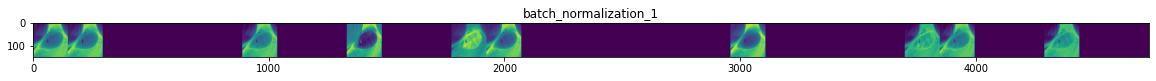

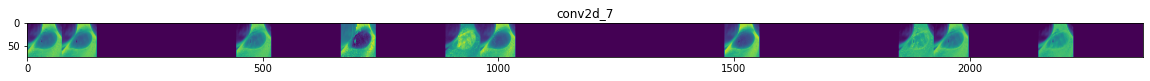

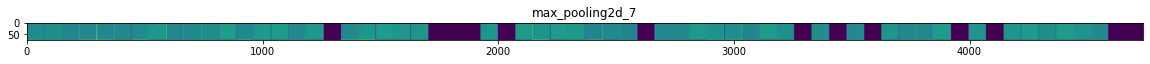

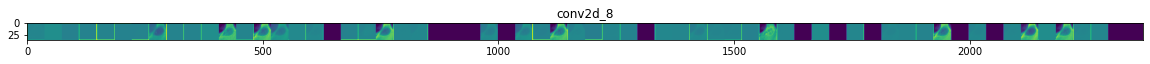

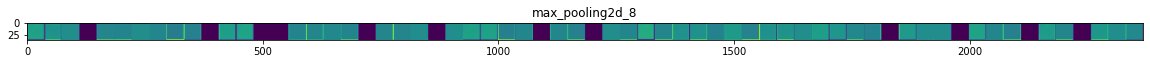

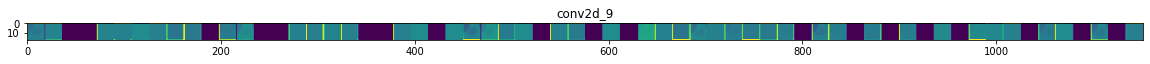

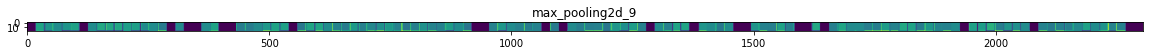

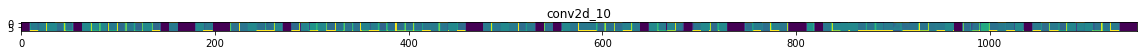

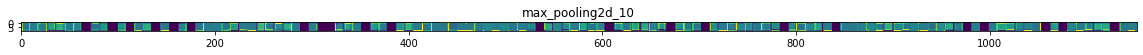

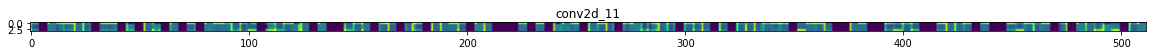

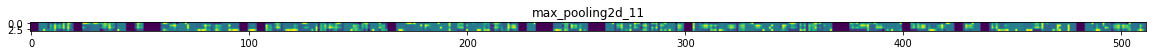

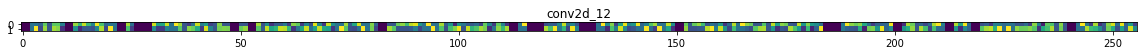

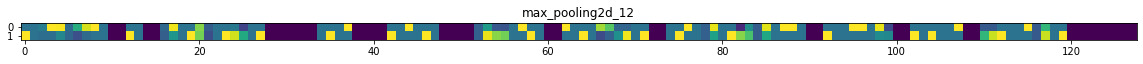

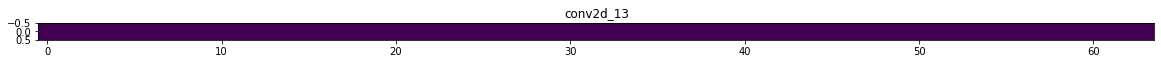

In [65]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

t_img= trachoma_Path+ "/trachomaDatasettftiimage24.jpg"


img = load_img(t_img, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0


successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))


    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid



    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis') 

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 64)
(1, 18, 18, 64)
(1, 18, 18, 128)
(1, 9, 9, 128)
(1, 9, 9, 128)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


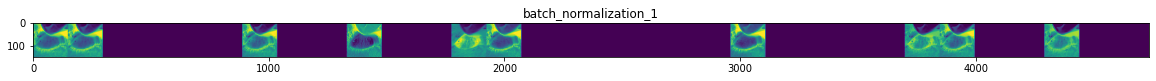

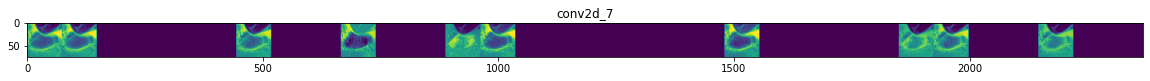

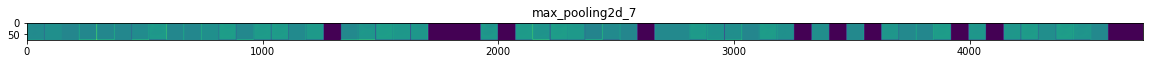

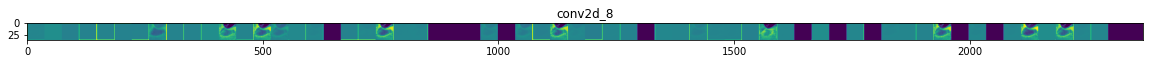

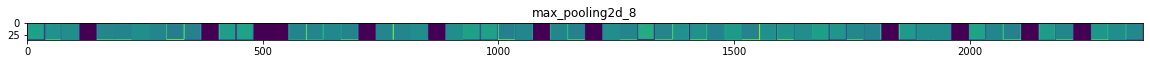

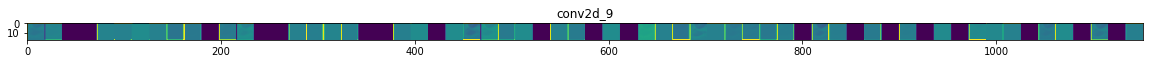

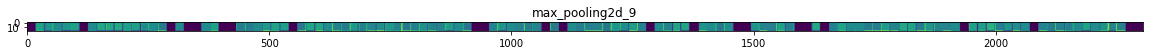

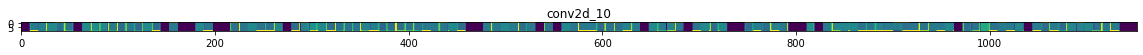

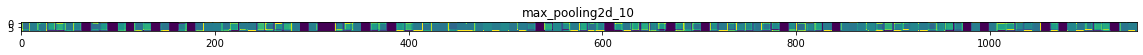

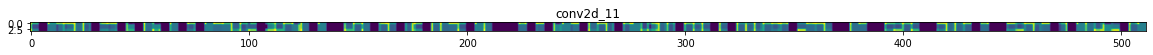

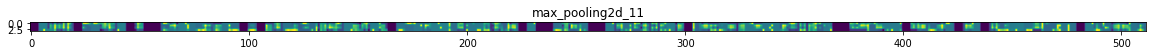

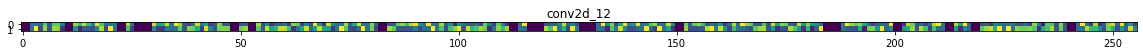

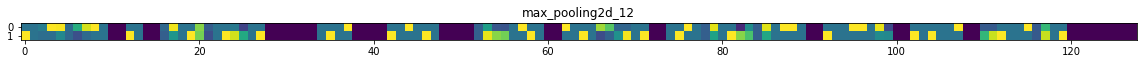

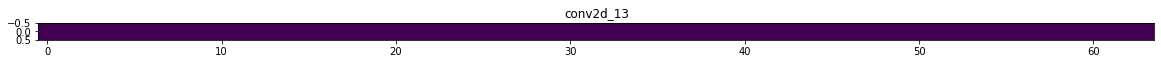

In [67]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

n_img= Normal_Path+ "/image480.jpg"


img = load_img(n_img, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0


successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))


    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid



    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis') 

In [68]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
n_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/healthTesracht'
#Check normal
CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(n_test+'/image891.jpg')])

print(prediction)  # will be a list in a list.



[[1.9941584e-05]]


In [69]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
t_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/trachTest'
#Check normal
CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(t_test+'/trachomaDatasettftiimage508.jpg')])

print(prediction)  # will be a list in a list.



[[0.988436]]


In [70]:
#Diagnosis of Trachoma
import cv2
import tensorflow as tf
import numpy as np
t_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/trachTest'

CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(t_test+'/trachomaDatasettftiimage511.jpg')])

print(prediction)  # will be a list in a list.



[[0.9958842]]


In [71]:
#Normal
import cv2
import tensorflow as tf
import numpy as np
n_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/healthTesracht'
#Check normal
CATEGORIES = ["healthyEyshor","trachomaDatasettfti"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(n_test+'/image856.jpg')])

print(prediction)  # will be a list in a list.



[[0.00096133]]


In [72]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('normalvtrach') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('trachomastuff.tflite', 'wb') as f:
    f.write(tflite_model)